In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Auto EDA Library
! pip install ydata_profiling
from ydata_profiling import ProfileReport

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
data = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv', header= None)
data.shape

(1728, 7)

In [4]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Mapping the column names as per the data dictionary
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# Quick EDA
data.profile_report(title='Car Report', progress_bar = False)

100%|██████████| 7/7 [00:00<00:00, 46.59it/s]


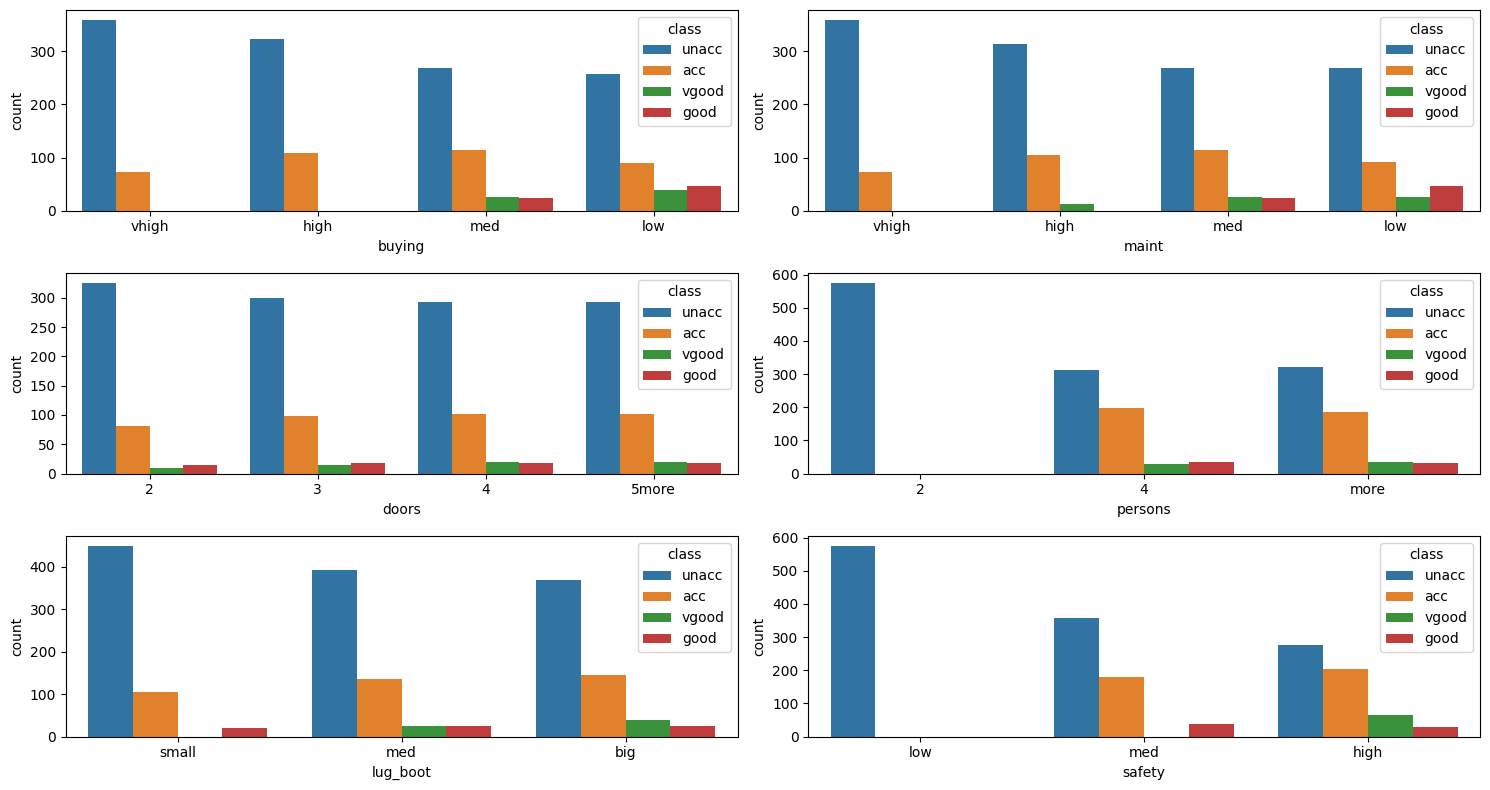

In [7]:
# Understanding the Categorical data
plt.figure(figsize=(15,8))
counter = 1
for cols in data.columns :
    if cols != 'class' :
      plt.subplot(3,2,counter)
      sns.countplot(data=data, x=cols, hue='class')
      counter += 1
plt.tight_layout()

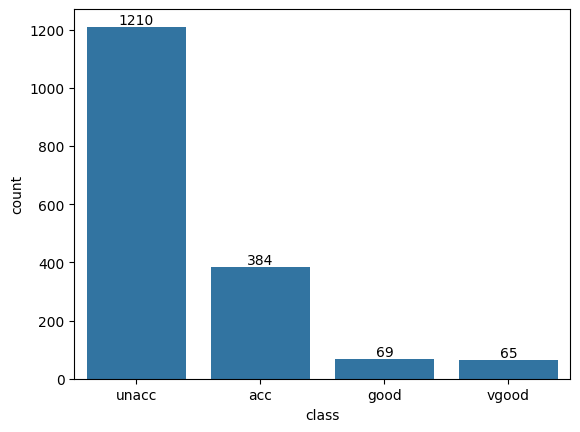

In [8]:
# Target column analysis
ax = sns.countplot(data=data, x='class', order = data['class'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
# Handling the categorical variable

# splitting the data based on dependent/independent variables
x = data.drop('class', axis=1)
y = data['class']

# Label Encoder
encoder = LabelEncoder()
for cols in x :
  x[cols] = encoder.fit_transform(x[cols])

# data after encoding
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [10]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Feature Scaling
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

Training Accuracy: 98.55282199710564 %
Testing Accuracy: 97.39884393063583 %

Classification Report:


               precision    recall  f1-score   support

         acc       0.95      0.96      0.95        77
        good       0.74      1.00      0.85        14
       unacc       1.00      0.98      0.99       242
       vgood       1.00      0.85      0.92        13

    accuracy                           0.97       346
   macro avg       0.92      0.95      0.93       346
weighted avg       0.98      0.97      0.97       346



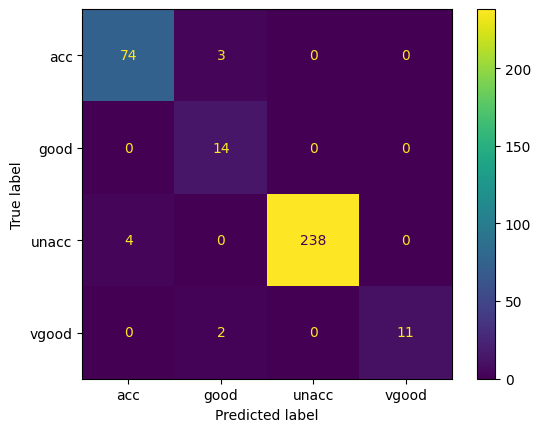

In [24]:
# Decision Tree
dtclassifier = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state = 42 )
dtclassifier.fit(x_train_scaled,y_train)
dt_train_score = dtclassifier.score(x_train_scaled, y_train)*100
print('Training Accuracy:',dt_train_score,'%')

# Model Prediction
y_pred_dt = dtclassifier.predict(x_test_scaled)
dt_test_score = accuracy_score(y_test, y_pred_dt)*100
print('Testing Accuracy:',dt_test_score,'%')

#Metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
print('\nClassification Report:\n\n\n', classification_report(y_test,y_pred_dt))

Training Accuracy: 100.0 %
Testing Accuracy: 97.97687861271676 %

Classification Report:


               precision    recall  f1-score   support

         acc       0.94      0.97      0.96        77
        good       0.93      0.93      0.93        14
       unacc       1.00      0.99      0.99       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



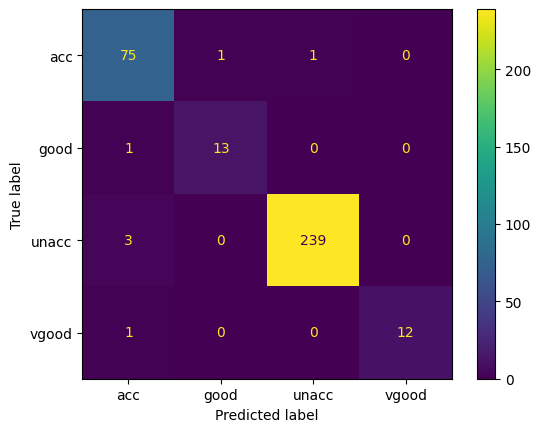

In [25]:
# Random Forest
rfclassifier = RandomForestClassifier(n_estimators=50,criterion='entropy', random_state = 42 )
rfclassifier.fit(x_train_scaled,y_train)
rf_train_score = rfclassifier.score(x_train_scaled, y_train)*100
print('Training Accuracy:',rf_train_score,'%')

# Model Prediction
y_pred_rf = rfclassifier.predict(x_test_scaled)
rf_test_score = accuracy_score(y_test, y_pred_rf)*100
print('Testing Accuracy:',rf_test_score,'%')

#Metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print('\nClassification Report:\n\n\n', classification_report(y_test,y_pred_rf))

Training Accuracy: 84.58755426917511 %
Testing Accuracy: 85.26011560693641 %

Classification Report:

               precision    recall  f1-score   support

         acc       0.60      1.00      0.75        77
        good       0.00      0.00      0.00        14
       unacc       1.00      0.90      0.95       242
       vgood       0.00      0.00      0.00        13

    accuracy                           0.85       346
   macro avg       0.40      0.48      0.42       346
weighted avg       0.83      0.85      0.83       346



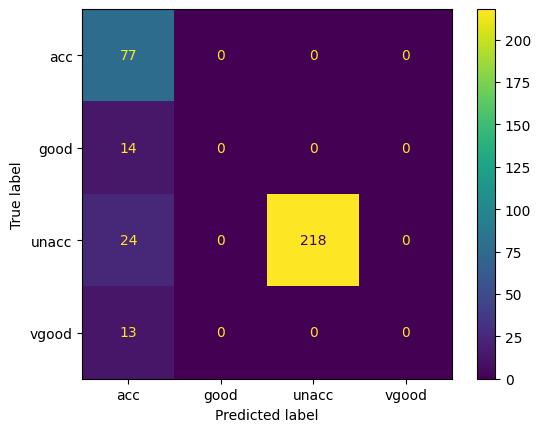

In [27]:
# Adaboost
abclassifer = AdaBoostClassifier(random_state=42)
abclassifer.fit(x_train_scaled, y_train)
ab_train_score = abclassifer.score(x_train_scaled, y_train)*100
print('Training Accuracy:',ab_train_score , '%')

# model prediction
y_pred_ab = abclassifer.predict(x_test_scaled)
ab_test_score = accuracy_score(y_test, y_pred_ab)*100
print('Testing Accuracy:', ab_test_score, '%')

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab)
print('\nClassification Report:\n\n', classification_report(y_test, y_pred_ab))

In [37]:
# Feature Importances
feature_importances = pd.Series(rfclassifier.feature_importances_*100, index=x.columns).sort_values(ascending=False)
feature_importances

,0
safety,28.182078
persons,22.353920
buying,18.111315
maint,15.919787
lug_boot,9.378528
doors,6.054373


In [39]:
# Comparing the models
models = pd.DataFrame({
    'Models': ['Decision Tree', 'Random Forest', 'Adaboost'],
    'Training Accuracy': [dt_train_score, rf_train_score, ab_train_score],
    'Testing Accuracy': [dt_test_score, rf_test_score, ab_test_score]
})
models

,Models,Training Accuracy,Testing Accuracy
0,Decision Tree,98.552822,97.398844
1,Random Forest,100.000000,97.976879
2,Adaboost,84.587554,85.260116


## Key Insights about this Project :
- The dataset contains 1728 instances and 7 attributes.
- The dataset includes features like buying price, maintenance cost, number of doors, number of persons, luggage boot size, safety, and the car's class.
- The target variable 'class' has four categories: unacc (unacceptable), acc (acceptable), good, and vgood (very good). The distribution is heavily skewed towards 'unacc'.
- All features are categorical.
- Three classification models were trained and evaluated: Decision Tree, Random Forest, and AdaBoost.
- The Random Forest model achieved the highest testing accuracy (97.98%), followed by the Decision Tree model (97.40%), and then the AdaBoost model (85.26%).
- According to the Random Forest model's feature importances, 'safety' and 'persons' are the most important features for predicting the car's class, while 'doors' is the least important.
